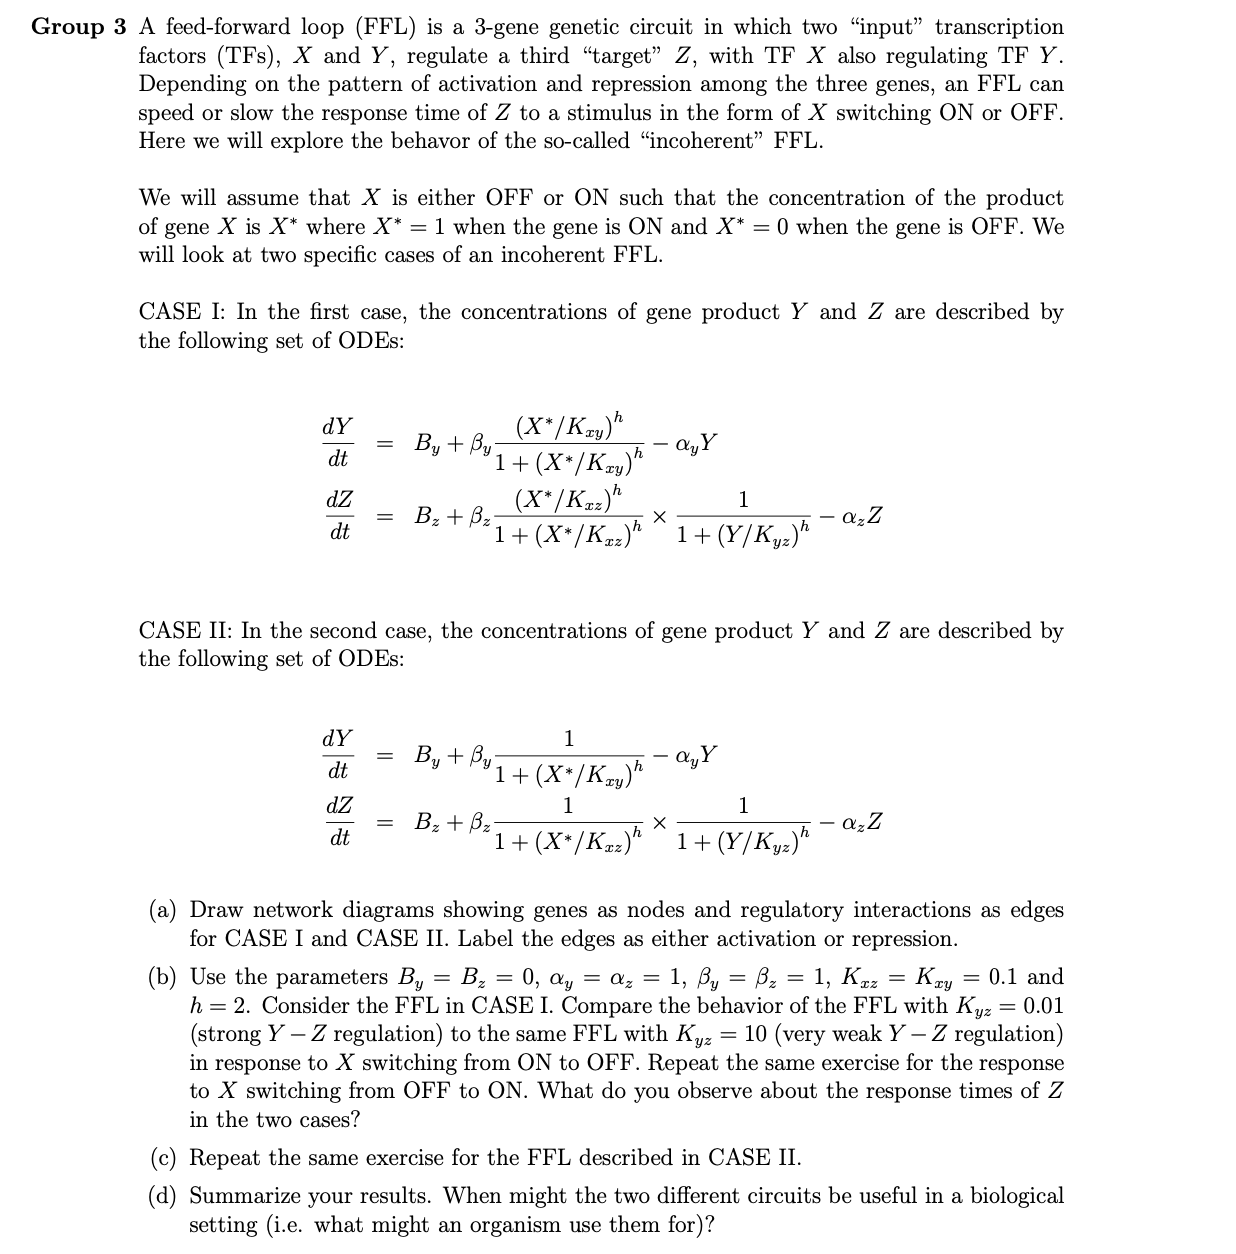

**Network diagrams:**

**Case 1:**
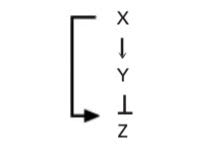


**Case 2:**
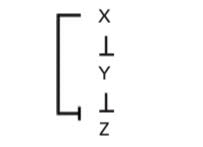

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [12]:
def solve_ode(By, Bz, ay, az, by, bz,
              Kxz, Kxy, Kyz, h, X,
              Y1, Z1, Y2, Z2):
    
    qxy = (X/Kxy)**h/(1 + (X/Kxy)**h)
    qxz = (X/Kxz)**h/(1 + (X/Kxz)**h)
    gxy = 1/(1 + (X/Kxy)**h)
    gxz = 1/(1 + (X/Kxz)**h)
    
    # The first system of ODE's
    dY1 = By + by*qxy - ay*Y1
    dZ1 = Bz + bz*qxz/(1 + (Y1/Kyz)**h) - az*Z1
    
    # The second system of ODE's
    dY2 = By + by*gxy - ay*Y2
    dZ2 = Bz + bz*gxz/(1 + (Y2/Kyz)**h) - az*Z2
    
    return [dY1, dZ1, dY2, dZ2]

In [13]:
# Integration 
def Euler_method(dt, t1, n_steps, By, Bz,
                 ay, az, by, bz, Kxz, Kxy, 
                 Kyz, h, X, Y0, Z0):
    
    Y1, Z1 = np.zeros(n_steps), np.zeros(n_steps) 
    Y2, Z2 = np.zeros(n_steps), np.zeros(n_steps)
    dZ1, dZ2 = np.zeros(n_steps-1), np.zeros(n_steps-1)
    
    Y1[0], Z1[0] = Y0, Z0
    Y2[0], Z2[0] = Y0, Z0
    l1, l2 = [], []
    
    # Solutions
    for i in range(1,t1):
        
        [dY1, dZ1[i-1], dY2, dZ2[i-1]] = solve_ode(By, Bz, ay, az, by, bz, 
                                                   Kxz, Kxy, Kyz, h, X,
                                                   Y1[i-1], Z1[i-1],
                                                   Y2[i-1], Z2[i-1])
        Y1[i] = Y1[i-1] + dY1*dt
        Z1[i] = Z1[i-1] + dZ1[i-1]*dt 
        
        Y2[i] = Y2[i-1] + dY2*dt
        Z2[i] = Z2[i-1] + dZ2[i-1]*dt 
        
    for i in range(t1,n_steps):
        
        [dY1, dZ1[i-1], dY2, dZ2[i-1]] = solve_ode(By, Bz, ay, az, by, bz,
                                                   Kxz, Kxy, Kyz, h, 1-X,
                                                   Y1[i-1], Z1[i-1],
                                                   Y2[i-1], Z2[i-1])
        Y1[i] = Y1[i-1] + dY1*dt
        Z1[i] = Z1[i-1] + dZ1[i-1]*dt
        
        Y2[i] = Y2[i-1] + dY2*dt
        Z2[i] = Z2[i-1] + dZ2[i-1]*dt
        
        
    resp_time1 = next(i for i, eps in enumerate(dZ1)    
                      if i>t1 and np.abs(eps)<=10**-4)*dt   # Response time for case I

    resp_time2 = next(i for i, eps in enumerate(dZ2) 
                      if i>t1 and np.abs(eps)<=10**-4)*dt   # Response time for case II

    return [Y1, Z1, Y2, Z2, resp_time1, resp_time2]

In [14]:
def plots(dt, t1, n_steps, By, Bz,
          ay, az, by, bz,
          Kxz, Kxy, K,
          h, Y0, Z0):
    
    fig = plt.figure(figsize=(12,12), constrained_layout=True)
    gs = fig.add_gridspec(5,2)
    ax = {}
    
    for j in [0,1]:
        for i in [0,1,3,4]:
            ax[i,j] = fig.add_subplot(gs[i, j]) 
            
    for i,X in enumerate([0,1]):
        for j, Kyz in enumerate(K):
            [Y1, Z1, Y2, Z2, rt1, rt2] = Euler_method(dt, t1, n_steps, By, Bz,
                                                      ay, az, by, bz,
                                                      Kxz, Kxy, Kyz,
                                                      h, X, Y0, Z0)
            t = np.linspace(0, n_steps*dt, n_steps)
            ax[i,j].plot(t, Z1, color='b', label='1',linewidth=2, alpha=1)
            ax[i,j].plot(t, Y1, color='orchid', label='2', linewidth=2, alpha=1, linestyle='--')
            ax[i,j].axvline(x=t1*dt, linestyle='--', color='g', label='3')
            ax[i,j].legend(['Z Concentration','Y Concentration'])
            at1 = AnchoredText('OFF ---> ON, $K_{yz}$=%1.2f'%Kyz, loc='upper left')
            at2 = AnchoredText('ON ---> OFF, $K_{yz}$=%1.2f'%Kyz, loc='upper left')
            ax[0,j].add_artist(at1)
            ax[1,j].add_artist(at2)
            ax[i,j].text(15,1.5, 'response time=%1.2f'%rt1)
            ax[i,j].set_xlabel('time')
            ax[i,0].set_ylabel('concentration')
            ax[i,j].set_ylim([-0.1,3])
            
            ax[i+3,j].plot(t, Z2, color='b', label='1',linewidth=2, alpha=1)
            ax[i+3,j].plot(t, Y2, color='orchid', label='2', linewidth=2, alpha=1, linestyle='--')
            ax[i+3,j].axvline(x=t1*dt, linestyle='--', color='g', label='3')
            ax[i+3,j].legend(['Z Concentration','Y Concentration'])
            at3 = AnchoredText('OFF ---> ON, $K_{yz}$=%1.2f'%Kyz, loc='upper left')
            at4 = AnchoredText('ON ---> OFF, $K_{yz}$=%1.2f'%Kyz, loc='upper left')
            ax[3,j].add_artist(at3)
            ax[4,j].add_artist(at4)
            ax[i+3,j].text(15,1.5, 'response time=%1.2f'%rt2)
            ax[i+3,j].set_xlabel('time')
            ax[i+3,0].set_ylabel('concentration')
            ax[i+3,j].set_ylim([-0.1,3])
            plt.figtext(0.5,1.04, "Case 1 ", ha="center", va="top", fontsize=18, color="r")
            plt.figtext(0.5,0.45, "Case 2", ha="center", va="top", fontsize=18, color="r")
            plt.savefig('1.png')

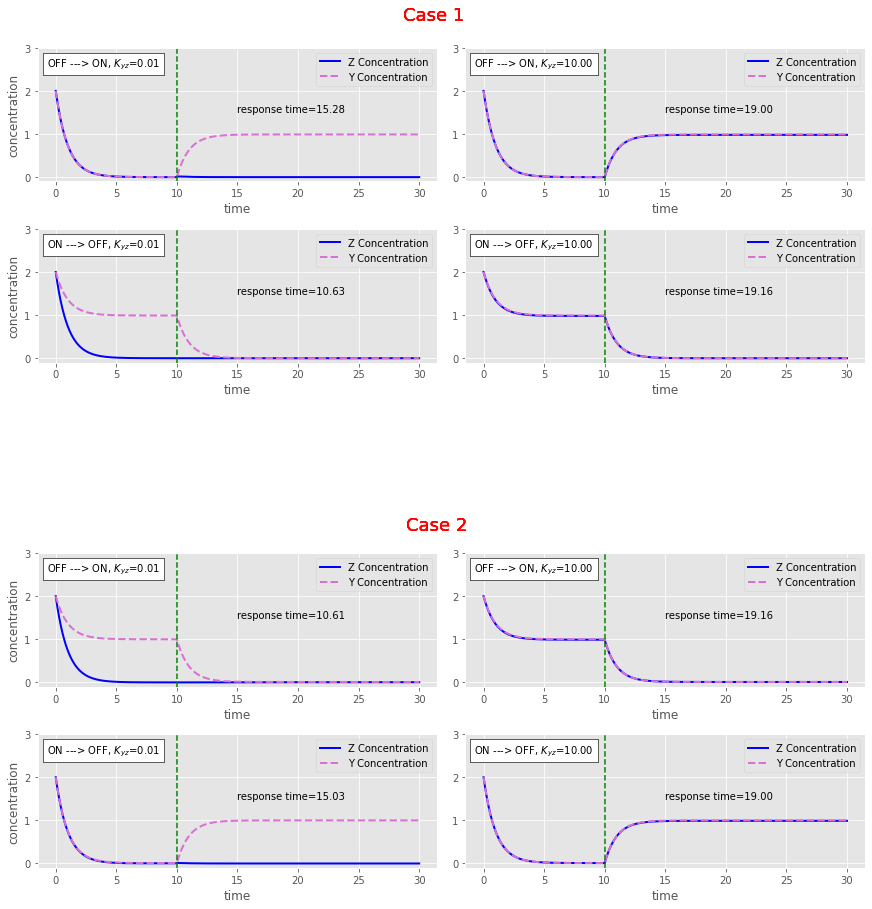

In [15]:
dt, t1, n_steps = 0.005, 2000, 6000
By, Bz, ay =  0, 0, 1
az, by, bz = 1, 1, 1
Kxz, Kxy, h = 0.1, 0.1, 2
Y0, Z0 = 2, 2
K = [0.01,10]

plots(dt, t1, n_steps, By, Bz,
      ay, az, by, bz,
      Kxz, Kxy, K,
      h, Y0, Z0)

On to off plots for one case is similar to off to on for the other case, because:

1- If $X=0$, then $\frac{(X/k)^{h}}{1+(X/k)^{h}}=0$ and  $\frac{1}{1+(X/k)^{h}}=1$.

2- If $X=1$, then since $K_{xy}=K_{xz}=0.1$ and $h=2$, then $\frac{(X/k)^{h}}{1+(X/k)^{h}}=\frac{100}{101}\approx 1$  and $\frac{1}{1+(X/k)^{h}}=\frac{1}{101} \approx 0.$  


**Incoherent FFL, is a mechanism for accelerating the reponse time (transcriptional response).** 

 ***Structure and function of the feed-forward loop
network motif by S. Mangan and U. Alon†***